In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
from os.path import join, getsize
import pandas as pd
from sklearn.cluster import KMeans

from sklearn.model_selection import train_test_split
from scipy.cluster.vq import *
from sklearn.svm import SVC
from sklearn import datasets, svm, metrics
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score
import math
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import math


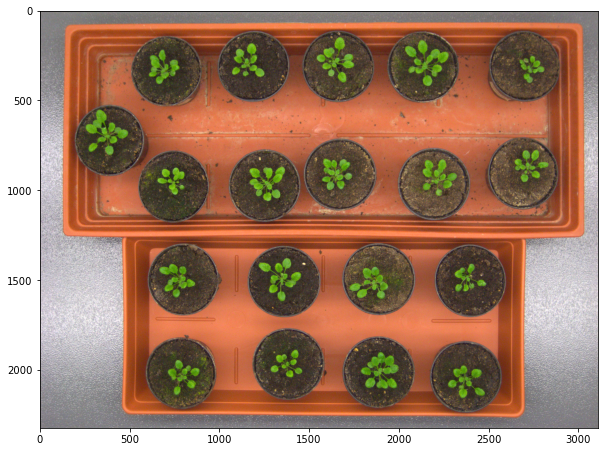

In [2]:

img = cv2.imread("./Ara2012/ara2012_tray01_rgb.png")
# img = cv2.imread("./Ara2013-Canon/ara2013_tray27_rgb.png")
# img = cv2.imread("./Ara2013-RPi/ara2013_tray18_rgb.png")
# img = cv2.imread("./Ara2012/ara2012_tray02_rgb.png")

img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2GRAY)
# img_csv = pd.read_csv( './Ara2013-Canon/ara2013_tray27_bbox.csv', header= None)

img_csv = pd.read_csv( './Ara2012/ara2012_tray01_bbox.csv', header= None)


plt.figure(figsize=(10,12))
plt.imshow(img_rgb)
plt.show()


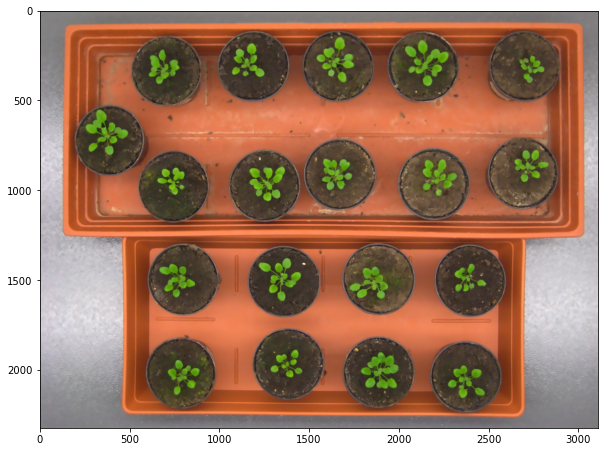

In [3]:
dst = cv2.fastNlMeansDenoisingColored(img_rgb,None,10,10,7,21)
plt.figure(figsize=(10,12))
plt.imshow(dst)

# dst_dilat = dilatiion = cv2.dilate(dst, kernel, iterations=3)

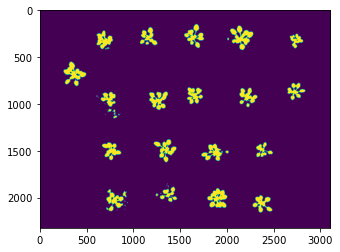

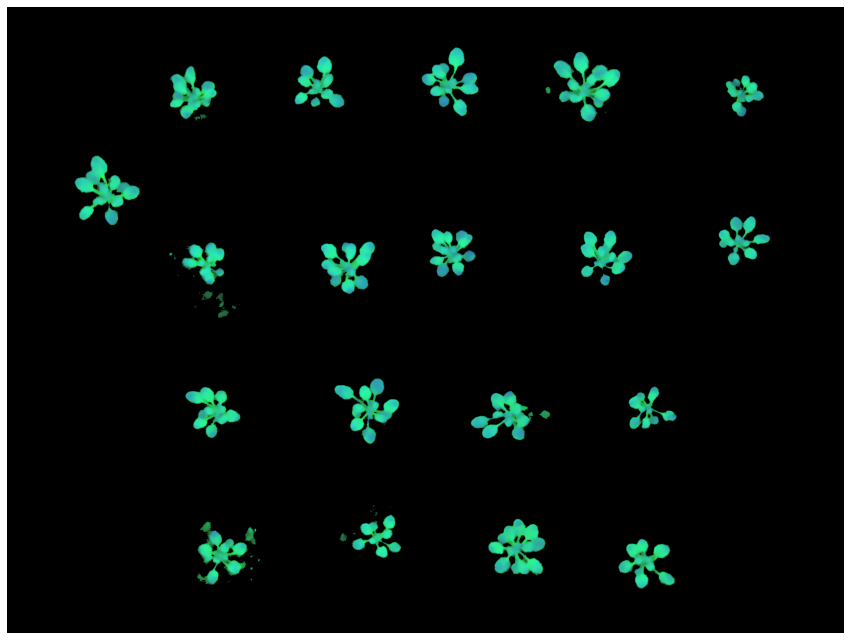

In [4]:
# 设定颜色hsv范围，绿色范围
# 标准绿色hsv范围，， min（35，43，46）max(77, 255, 255)
# 
greenLower = np.array([33, 41, 45])
greenUpper = np.array([77, 255, 255])

# 图像转化成HSV格式,这里rgb转hsv
hsv = cv2.cvtColor(dst, cv2.COLOR_RGB2HSV)

# 淹模， 去除颜色范围外的其余颜色
mask = cv2.inRange(hsv, greenLower, greenUpper)

# 将掩膜和图像逐像素相加，位运算, 提取绿色部分
green = cv2.bitwise_and(hsv, hsv, mask=mask)

plt.imshow(mask)
plt.show()

plt.figure(figsize=(15,15))
plt.imshow(green)
plt.axis('off')
plt.show()

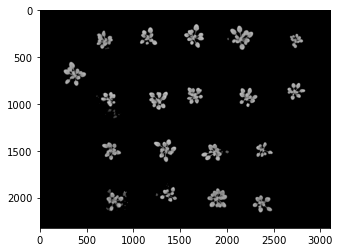

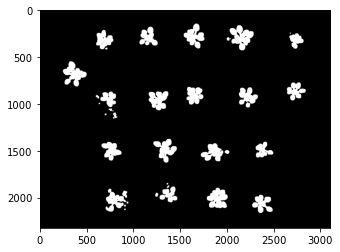

In [6]:
img_temp = cv2.cvtColor(green, cv2.COLOR_HSV2BGR)
img_hsv_2_gray = cv2.cvtColor(img_temp, cv2.COLOR_BGR2GRAY)
# 二值化操作阈值处理
_, thresh = cv2.threshold(img_hsv_2_gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

kernel = np.ones((3, 3), np.uint8)
# img_morph = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel)

# cv2.erode(img_morph, kernel, img_morph, iterations=1)
img_dila = cv2.dilate(thresh, kernel, thresh, iterations=5)

plt.imshow(img_hsv_2_gray, 'gray')
plt.show()

plt.imshow(img_dila,'gray')
plt.show()

#膨胀操作，因为是对线条进行提取定位，所以腐蚀可能会造成更大间隔的断点，将线条切断，因此仅做膨胀操作

In [7]:
# # 第一个参数是寻找轮廓的图像
# 第二个参数表示轮廓的检索模式，有四种：
    # #获取图像轮廓坐标，其中contours为坐标值，此处只检测外形轮廓cv2.RETR_EXTERNAL 

    # # cv2.RETR_CCOMP 建立两个等级的轮廓，上面的一层为外边界，里面的一层为内孔的边界信息。如果内孔内还有一个连通物体，这个物体的边界也在顶层。
    # # cv2.RETR_TREE建立一个等级树结构的轮廓。
    # #  cv2.RETR_LIST检测的轮廓不建立等级关系
# 第三个参数method为轮廓的近似办法
    # #  cv2.CHAIN_APPROX_NONE存储所有的轮廓点，相邻的两个点的像素位置差不超过1，即max（abs（x1-x2），abs（y2-y1））==1
    # #     cv2.CHAIN_APPROX_SIMPLE压缩水平方向，垂直方向，对角线方向的元素，只保留该方向的终点坐标，#例如一个矩形轮廓只需4个点来保存轮廓信息
    # #     cv2.CHAIN_APPROX_TC89_L1，CV_CHAIN_APPROX_TC89_KCOS使用teh-Chinl chain 近似算法
# 返回值
# cv2.findContours()函数返回三个值，一个是图像，一个是轮廓本身，还有一个是每条轮廓对应的属性。
# 对于轮廓是以坐标的形式返回，可以通过函数cv2.drawContours()绘制出轮廓


In [8]:
# 只检测外形轮廓cv2.RETR_EXTERNAL 
_,contours, hierarchy = cv2.findContours(img_dila, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

print(len(contours))
# contours = sorted(contours, key=cv2.contourArea, reverse=True)


# max_area = cv2.contourArea(contours[0])

# min_area = cv2.contourArea(contours[-1])

39


In [9]:
xxxx = [cv2.boundingRect(c) for c in contours]

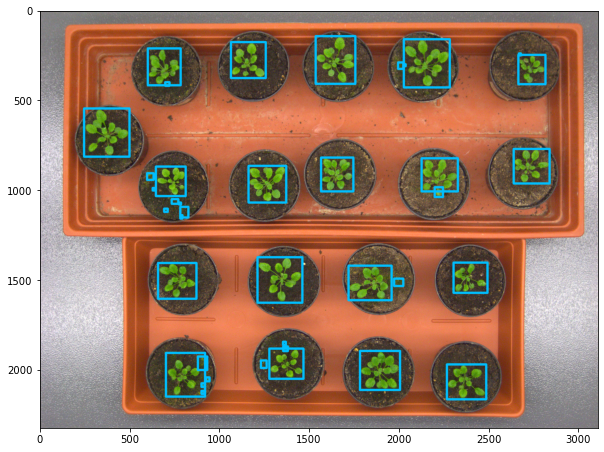

In [10]:

centers = []
if len(contours) > 0:
    #cv2.boundingRect()返回轮廓矩阵的坐标值，四个值为x, y, w, h， 其中x, y为左上角坐标，w,h为矩阵的宽和高
    
    boxes = [cv2.boundingRect(c) for c in contours] 
    # normal size
#     boxes_min = [cv2.minAreaRect(c) for c in contours]
    
    for box in boxes:
        
        x, y, w, h = box
        cv2.rectangle(img_rgb, (x, y), (x+w, y+h), (0, 191, 255), 12)
        
        centers.append([(x+w/2),(y+h/2)])
    
    plt.figure(figsize=(10,12))
    plt.imshow(img_rgb)
    
    


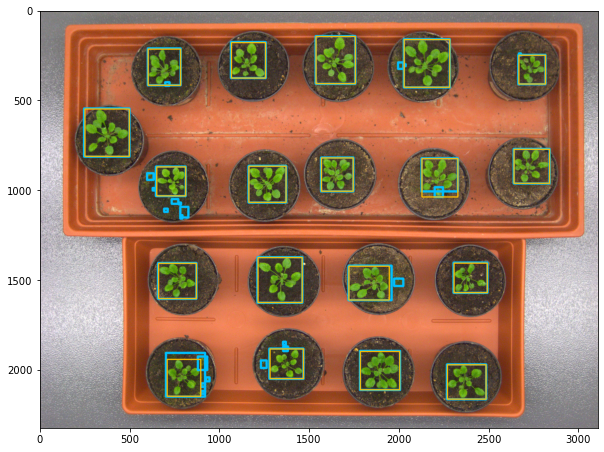

In [11]:

for j in range(len(img_csv)):
    x1, y1, x2, y2, x3, y3, x4, y4 = img_csv.loc[j, :]
    # put Two points on the diagonal into a list
    cv2.rectangle(img_rgb, (x1, y1), (x3, y3), (255, 190, 0), 6)
    
#     cv2.rectangle(dst, (x1, y1), (x3, y3), (255, 190, 0), 6)
    
plt.figure(figsize=(10,12))
plt.imshow(img_rgb)
plt.show()
    
        
#         test_labels_csv.append([x1, y1, x3, y3])

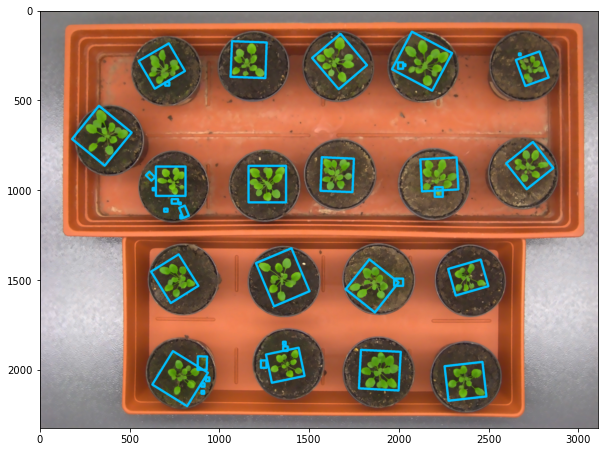

In [12]:

center_points = []
if len(contours) > 0:
    for cont in contours:   
        box = cv2.minAreaRect(cont)
        points = np.int0(cv2.boxPoints(box))
        # 统计中心位置
        p1x,p1y = points[0,0], points[0,1]
        p3x,p3y = points[2,0], points[2,1]
        center =  [(p1x+p1y )/2,(p3x+p3y)/2]
        center_points.append(center)
        #draw min rectangle 
        cv2.drawContours(dst, [points],0, (0,191,255),12)
        
    plt.figure(figsize=(10,12))
    plt.imshow(dst)



In [13]:

center_points = sorted(center_points, key=lambda center_points: center_points[0], reverse=True)


In [14]:
# for j in range(len(img_csv)):
    # 2
    # for indexs in img_csv.index:
    #     item = img_csv.loc[indexs].values[0:].tolist()
    #     test_labels_csv.append(item)

In [15]:
# # 第一个参数是寻找轮廓的图像
# 第二个参数表示轮廓的检索模式，有四种：
    # #获取图像轮廓坐标，其中contours为坐标值，此处只检测外形轮廓cv2.RETR_EXTERNAL 

    # # cv2.RETR_CCOMP 建立两个等级的轮廓，上面的一层为外边界，里面的一层为内孔的边界信息。如果内孔内还有一个连通物体，这个物体的边界也在顶层。
    # # cv2.RETR_TREE建立一个等级树结构的轮廓。
    # #  cv2.RETR_LIST检测的轮廓不建立等级关系
# 第三个参数method为轮廓的近似办法
    # #  cv2.CHAIN_APPROX_NONE存储所有的轮廓点，相邻的两个点的像素位置差不超过1，即max（abs（x1-x2），abs（y2-y1））==1
    # #     cv2.CHAIN_APPROX_SIMPLE压缩水平方向，垂直方向，对角线方向的元素，只保留该方向的终点坐标，#例如一个矩形轮廓只需4个点来保存轮廓信息
    # #     cv2.CHAIN_APPROX_TC89_L1，CV_CHAIN_APPROX_TC89_KCOS使用teh-Chinl chain 近似算法
# 返回值
# cv2.findContours()函数返回三个值，一个是图像，一个是轮廓本身，还有一个是每条轮廓对应的属性。
# 对于轮廓是以坐标的形式返回，可以通过函数cv2.drawContours()绘制出轮廓


In [16]:
# LPF：低通滤波，，，去除噪声，模糊图像； 
# HDF： 高通滤波，找到图像的边缘

# 2d 卷积， cv2.filter2D() 
# （1）平均  cv2.blur(img,(5，5)), cv2.boxFilter() ## 需传入参数， normalize =False
# (2) 高斯模糊， cv2.GaussianBlur(img, (5,5), 0),0指，高斯函数标准差， cv2.getGaussianKernel()
#  (3) 中值滤波，median = cv2.medianBlur(img,3)经常用于去除胡椒盐噪声
#（4）双边滤波 cv2.bilateralFilter(img,9,75,75 )